I think I learned more varieties of filters than those in https://www.biorxiv.org/content/10.1101/677237v3.full.pdf

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from thesis_v2 import dir_dict
from thesis_v2.training.training_aux import load_training_results

In [3]:
from sys import path
from os.path import join, exists, dirname
from os import makedirs



In [4]:
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20200218 as param_iterator_obj,
    keygen
)

In [5]:
from numpy.linalg import norm
import numpy as np

In [6]:
from pickle import load

In [7]:
def load_one_result(filename):
    with open(filename, 'rb') as f:
        return load(f)

In [8]:
# create dir
global_vars = {
    'save_dir': join(dir_dict['analyses'],
                     'scripts+yuanyuan_8k_a_3day+maskcnn_polished_with_rcnn_k_bl+20200218_layer3',
                    'pca')
}

In [9]:
from math import sqrt
from torchvision.utils import make_grid
from torch import tensor

In [10]:
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(
    ('042318', '043018','051018',))
                           )
assert cc_max_all_neurons.shape == (79,)

In [11]:
def do_analysis(label_fname_list):
    for label, fname in label_fname_list:
        print(label)
        data = load_one_result(fname)
#         for x, y in data.items():
#             print(x, y.dtype, y.shape)
            
        
        # ok. what to show here?
        # first, let's reshape `components`.
        components = data['components']
        assert components.ndim == 2
        n_el_per_filter = components.shape[1]
        kernel_size = round(sqrt(n_el_per_filter))
        assert type(kernel_size) is int and kernel_size**2 == n_el_per_filter
        components = components.reshape(components.shape[0], 1, kernel_size, kernel_size)
        
        # this components is ready to be displayed using pytorch's util
        components_grid = make_grid(tensor(components[:20]), nrow=10,normalize=True, scale_each=True)
        components_grid = components_grid.numpy().transpose(1, 2, 0)
        print(np.cumsum(data['explained_variance_ratio'])[:20])
        plt.close('all')
        plt.figure(figsize=(8,6))
        plt.imshow(components_grid,vmin=0.0,vmax=1.0,interpolation='none')
        plt.show()
        

In [12]:
def collect_all(cls_set):
    save_dir = global_vars['save_dir']
    count = 0
    
    for idx, param in enumerate(param_iterator_obj().generate()):
        
        if param['rcnn_bl_cls'] not in cls_set:
            # ignore cls=1,2 models.
            continue
            
        if param['kernel_size_l23'] in {3,5}:
            # too small.
            continue
    
    
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        result = load_training_results(key, return_model=False, return_checkpoint=True)
        cc_raw = np.asarray(result['stats_best']['stats']['test']['corr'])
        assert cc_raw.shape == (79,)
        # load loss curve to make sure we are good in approximation.
        corr_test = ((cc_raw/cc_max_all_neurons)**2).mean()
        # only keep 0.6+ models
        if corr_test < 0.62:
            continue
        
        count += 1
        
        
        def filename_gen(x):
            return join(save_dir, f'{idx}/unit_norm', f'{x}.pkl')
        
        filename_set = {'ff', 'lateral'}
        if not all([exists(filename_gen(x)) for x in filename_set]):
            # right now if partially done, the partial results will be fully overwritten.
            continue
            raise RuntimeError('bug!')
        
        # show some results.
        verbose = count % 5 == 0
        
        if verbose:
            print(count, key, corr_test)
            
            # load lateral one
            do_analysis([(x, filename_gen(x)) for x in [
                'lateral','ff',
                # remove this, confusing.
#                 'all'
            ]
                        ])
        
        
    print(count)


20 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se0 0.6363475256105169
lateral
[0.22804232 0.38666655 0.52320221 0.61230163 0.67310768 0.72587645
 0.75697462 0.77886407 0.79738967 0.81321883 0.82732541 0.83853921
 0.84855967 0.85553631 0.86233251 0.86821311 0.87390753 0.87938668
 0.88472257 0.88998836]


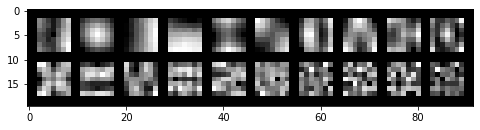

ff
[0.26362547 0.40347461 0.52309921 0.61613458 0.67309875 0.72069756
 0.75215377 0.77723809 0.79854516 0.81413809 0.82718488 0.83910015
 0.84990196 0.85721134 0.86428582 0.87051849 0.87660859 0.88234758
 0.88798645 0.89326866]


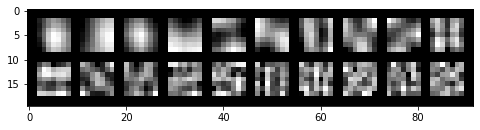

30 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lpoisson/m_se0 0.6227733572856736
lateral
[0.19502668 0.3691703  0.44717643 0.51778495 0.57986182 0.63373248
 0.68125447 0.72636019 0.75670911 0.78159105 0.80262001 0.82240471
 0.83921936 0.85047776 0.85985093 0.86857102 0.87674301 0.88373401
 0.88912158 0.89393335]


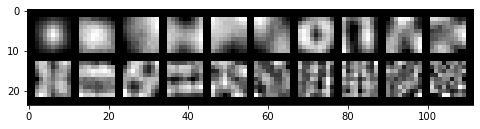

ff
[0.22925366 0.3518479  0.44979699 0.53483084 0.59167178 0.6431928
 0.68660113 0.72218582 0.7488003  0.77377308 0.7942801  0.81186208
 0.82686698 0.84003481 0.85058597 0.86007679 0.86787091 0.87528451
 0.88135891 0.88723203]


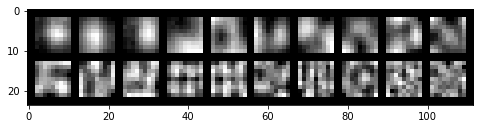

40 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6443632281232486
lateral
[0.22636096 0.39373742 0.52245157 0.61877497 0.69209756 0.75411373
 0.79020938 0.81794409 0.84296565 0.8649429  0.88326584 0.89663736
 0.90867139 0.91590588 0.9225604  0.92788391 0.93268416 0.93662448
 0.9403909  0.94383783]


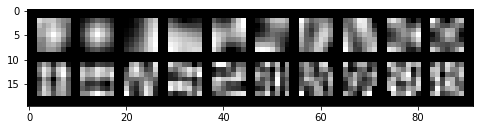

ff
[0.24945439 0.3999959  0.51199519 0.60516465 0.66459502 0.72096919
 0.7564679  0.79103679 0.81770506 0.8363637  0.85211796 0.86586163
 0.87889135 0.88849722 0.89661281 0.90322765 0.90947913 0.91501193
 0.92029155 0.92540178]


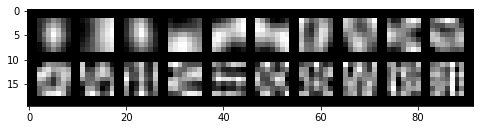

55 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6418870724479459
lateral
[0.17609788 0.28006418 0.36507462 0.4349009  0.50047848 0.56372981
 0.61867635 0.66976823 0.71442026 0.74957841 0.78209283 0.81152091
 0.83932275 0.85748051 0.87328891 0.88628355 0.89805831 0.90733167
 0.91563631 0.92295146]


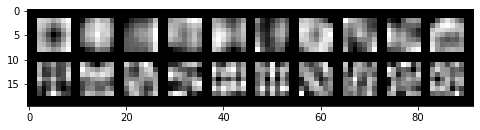

ff
[0.26236916 0.41902762 0.51400302 0.59647225 0.65490118 0.7021559
 0.74570893 0.78005214 0.80538375 0.82722817 0.84594754 0.86417665
 0.87826868 0.89165218 0.90447546 0.91449076 0.92282535 0.93089977
 0.93833787 0.94452727]


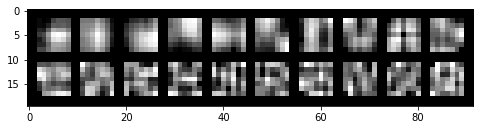

65 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se0 0.6478255482982895
lateral
[0.21749242 0.35436691 0.47129031 0.55195344 0.62693039 0.68966682
 0.73228624 0.76663273 0.79913532 0.82528403 0.84849726 0.86913286
 0.88377511 0.89458336 0.90411441 0.91137331 0.91685229 0.92220195
 0.92690098 0.93106341]


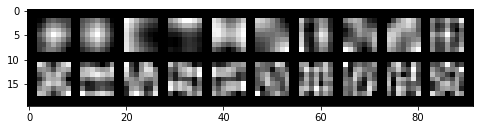

ff
[0.29388915 0.42641509 0.54993897 0.64248154 0.6933074  0.74136245
 0.7780748  0.80855705 0.83071908 0.85276892 0.87015404 0.88383957
 0.89457878 0.90393295 0.91229053 0.91830488 0.92411241 0.92907517
 0.93390219 0.93849272]


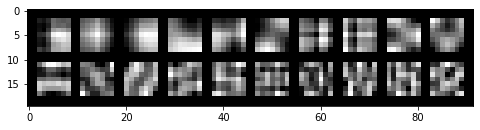

80 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lmse/m_se1 0.6274580061342602
lateral
[0.20506642 0.35166192 0.46213716 0.55759486 0.63082578 0.6928683
 0.73759632 0.77137523 0.7993696  0.82262939 0.84286943 0.85906004
 0.87314544 0.88193779 0.88980958 0.89686682 0.90322339 0.90920851
 0.9144592  0.91956356]


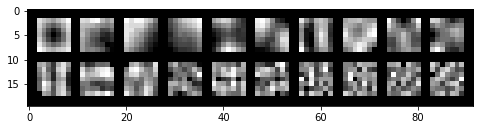

ff
[0.27109979 0.4152875  0.55014221 0.6267868  0.68287419 0.73401012
 0.77402024 0.80645402 0.82826359 0.84591683 0.86238956 0.87821618
 0.89197607 0.90026653 0.90775663 0.91413279 0.92011442 0.9260706
 0.93126965 0.93619375]


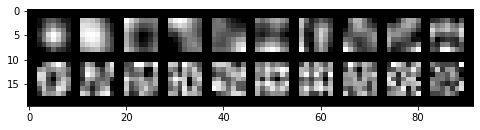

95 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l239/sc0.01/sm0.000005/lmse/m_se1 0.6247487091728379
lateral
[0.19267187 0.3280832  0.44442678 0.53185674 0.60043409 0.65742028
 0.69653726 0.7304511  0.75934935 0.78638626 0.80711068 0.82506915
 0.83865197 0.84788268 0.85575941 0.86273702 0.86888371 0.87441261
 0.87912033 0.88337849]


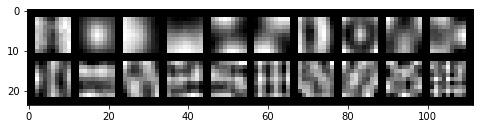

ff
[0.20178768 0.32839742 0.42975285 0.51351811 0.58109578 0.63356637
 0.67754295 0.71379461 0.7427676  0.76544128 0.78620181 0.80375269
 0.81916031 0.82989147 0.83856155 0.84690459 0.85465205 0.86197947
 0.86794788 0.87357725]


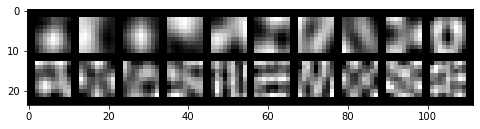

100 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6251191410698792
lateral
[0.23496503 0.4405376  0.54455928 0.61726069 0.67792752 0.71697622
 0.75422917 0.78381983 0.80993627 0.83187495 0.85320374 0.86651642
 0.8788466  0.88810384 0.89626388 0.90362656 0.90977591 0.9157226
 0.92103476 0.92597314]


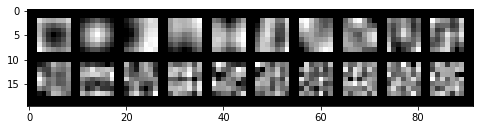

ff
[0.33717737 0.47307975 0.58142548 0.66086734 0.70546962 0.74323453
 0.77811846 0.80135086 0.82118418 0.83875982 0.85372598 0.86759721
 0.87810474 0.88665149 0.89463468 0.9016833  0.90792828 0.91398418
 0.91964246 0.92492713]


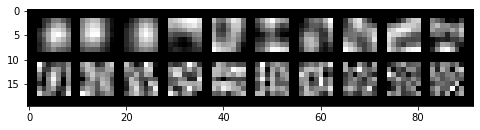

115 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actrelu/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6304407539819661
lateral
[0.2450758  0.37703359 0.48730298 0.56491284 0.61164215 0.65487682
 0.68073784 0.70218443 0.72011446 0.73707157 0.75092215 0.76358446
 0.77497338 0.78553259 0.79488305 0.80355054 0.81202289 0.82021029
 0.82837758 0.83642527]


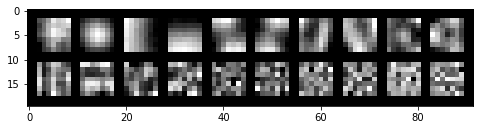

ff
[0.24755413 0.38431674 0.48339072 0.57170694 0.61964104 0.6657181
 0.693377   0.71650019 0.73627815 0.75183131 0.76523434 0.77794288
 0.79008657 0.79999035 0.80872307 0.81696797 0.825198   0.83312647
 0.84067973 0.84803767]


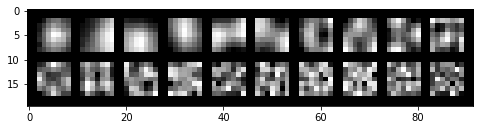

125 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch8/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c4/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6212370825268301
lateral
[0.18855795 0.27738142 0.35869595 0.43232995 0.4988277  0.55604488
 0.60825282 0.6593506  0.70483884 0.74845259 0.78237988 0.81189112
 0.83756649 0.85844276 0.87866807 0.89440338 0.90772073 0.91922201
 0.92982373 0.93894124]


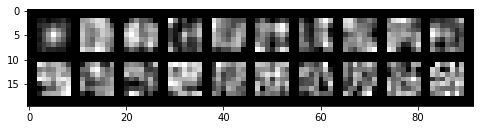

ff
[0.33065294 0.46845293 0.58605867 0.66132422 0.71309856 0.75676759
 0.79098842 0.81664849 0.84042936 0.86176443 0.88048348 0.89785909
 0.91101243 0.92375353 0.93508519 0.94396867 0.95234862 0.95823984
 0.96356923 0.96822625]


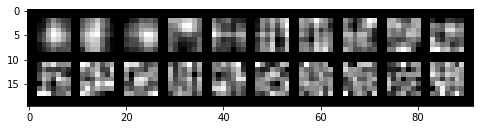

130 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch16/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6277969883942877
lateral
[0.18118927 0.33762228 0.44094685 0.52001177 0.58483123 0.63985953
 0.69286421 0.73210425 0.7671753  0.79762051 0.8259841  0.84828695
 0.86406455 0.87711884 0.88863115 0.89747142 0.90546107 0.91202099
 0.91802373 0.92387114]


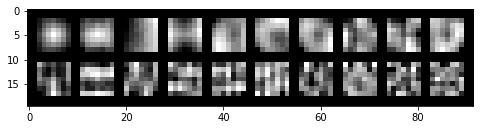

ff
[0.31072306 0.44356307 0.5684189  0.64606781 0.69819294 0.74203516
 0.77554758 0.80727444 0.83024785 0.84866329 0.86676472 0.88257358
 0.89390483 0.90404553 0.91374925 0.92087908 0.92727337 0.93297698
 0.93833512 0.94340588]


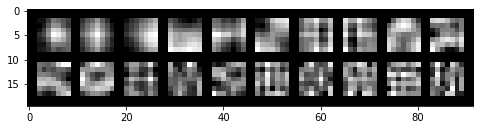

140 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_True/k_l237/sc0.01/sm0.000005/lpoisson/m_se1 0.6298183452475108
lateral
[0.28294652 0.42517588 0.53702437 0.61130868 0.67612861 0.72571756
 0.76182186 0.7898016  0.81350091 0.83386099 0.85320295 0.86760826
 0.87791015 0.8867225  0.89361401 0.8997793  0.9050869  0.9101113
 0.91453218 0.91869133]


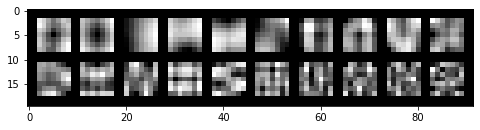

ff
[0.30678902 0.45549656 0.59574834 0.66402537 0.71558981 0.7545863
 0.78941248 0.81893145 0.83929965 0.85636257 0.86748298 0.87827493
 0.88770921 0.8956382  0.90223344 0.90769631 0.9129676  0.91778924
 0.92196702 0.92599823]


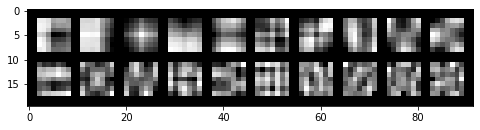

145 yuanyuan_8k_a_3day/maskcnn_polished_with_rcnn_k_bl/s_selegacy/in_sz50/out_ch32/num_l3/k_l19/k_p3/ptavg/bn_a_fcFalse/actsoftplus/r_c3/r_psize1/r_ptypeNone/r_acccummean/ff1st_True/ff1stbba_False/k_l239/sc0.01/sm0.000005/lpoisson/m_se1 0.6261815634250865
lateral
[0.1796342  0.30912806 0.40249664 0.48194362 0.55239628 0.61130415
 0.661643   0.69966118 0.73708383 0.77255547 0.7971601  0.82073539
 0.84191265 0.85464653 0.86633845 0.87708654 0.88661751 0.89460276
 0.90236543 0.90884249]


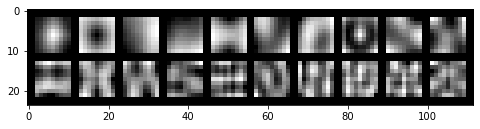

ff
[0.22720777 0.35538262 0.46194324 0.53585955 0.59094117 0.63906315
 0.68071452 0.71587174 0.74963578 0.77551695 0.79714688 0.81677756
 0.83285504 0.8475009  0.85948514 0.87076983 0.87939683 0.88779152
 0.89529871 0.90142561]


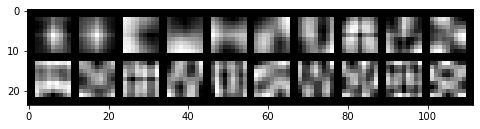

145


In [13]:
collect_all({3,4})